In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

### Make data

In [2]:
numcat = 2
categories = ['healthy', 'disease']

In [3]:
df_h = pd.read_csv('health_data.csv')
print(df_h.head())

train_per = 0.7 #train test split
#randomize indces, take the first 80% of the indeces and last 20 percent as test
indices = np.random.permutation(df_h.shape[0])
train_ind, test_ind = indices[:int(train_per*df_h.shape[0])], indices[int(train_per*df_h.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df_h.loc[train_ind, :], df_h.loc[test_ind, :]
train_df, test_df = train_df.reset_index(drop = True), test_df.reset_index(drop = True)
# train_df.drop('index')

# Data in numpy arrays (also separating train data by classes)
X_train = train_df.drop('category', axis = 1).to_numpy()
y_train = train_df.drop(['age', 'restbps', 'chol'], axis = 1).to_numpy().reshape((X_train.shape[0],))

# X_train_0, X_train_1 = train_df.loc[train_df['category'] == 0].drop('category', axis = 1).to_numpy(),train_df.loc[train_df['category'] == 1].drop('category', axis = 1).to_numpy()
X_test, y_test = test_df.drop('category', axis = 1).to_numpy(), test_df['category'].to_numpy().reshape((-1, ))
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0
(211, 3) (211,) (489, 3) (489,)


In [4]:
#Normalize the data

### RBF Kernel

In [5]:
#Training
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
#testing
y_pred_test = clf.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8561    0.9444    0.8981       126
           1     0.9028    0.7647    0.8280        85

    accuracy                         0.8720       211
   macro avg     0.8794    0.8546    0.8631       211
weighted avg     0.8749    0.8720    0.8699       211



### Linear Kernel

In [9]:
#Training
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
#testing
y_pred_test = clf.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8992    0.8492    0.8735       126
           1     0.7935    0.8588    0.8249        85

    accuracy                         0.8531       211
   macro avg     0.8463    0.8540    0.8492       211
weighted avg     0.8566    0.8531    0.8539       211



### Cross Validation
To find optimal value of C 

In [12]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='linear', C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.14925310330317687, 0.15131495897327996, 0.15131495897327996, 0.15131495897327996, 0.1533557752998107]


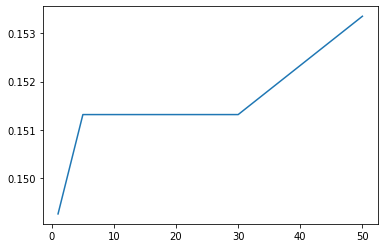

In [13]:
print(error)
plt.plot(rangeC, error)

### Polynomial Kernel

### Degree 2

In [14]:
#Training
clf = svm.SVC(kernel='poly', degree = 2, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
#testing
y_pred_test = clf.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8871    0.8730    0.8800       126
           1     0.8161    0.8353    0.8256        85

    accuracy                         0.8578       211
   macro avg     0.8516    0.8542    0.8528       211
weighted avg     0.8585    0.8578    0.8581       211



### Cross Validation
To find optimal value of C 

In [17]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 2, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.15337681464338326, 0.14519250999368827, 0.15131495897327996, 0.1533557752998107, 0.15129391962970762]


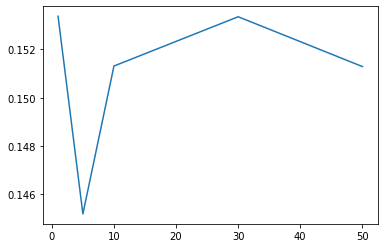

In [18]:
print(error)
plt.plot(rangeC, error)

### Degree 3

In [19]:
#Training
clf = svm.SVC(kernel='poly', degree = 3, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#testing
y_pred_test = clf.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8800    0.8730    0.8765       126
           1     0.8140    0.8235    0.8187        85

    accuracy                         0.8531       211
   macro avg     0.8470    0.8483    0.8476       211
weighted avg     0.8534    0.8531    0.8532       211



### Cross Validation
To find optimal value of C 

In [22]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 3, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.14721228697664634, 0.14927414264674943, 0.15333473595623803, 0.15333473595623803, 0.15741636860929942]


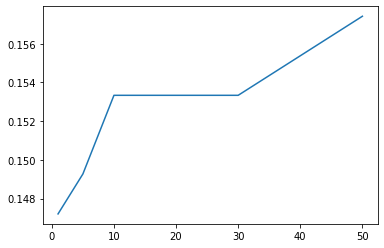

In [23]:
print(error)
plt.plot(rangeC, error)

### Degree 4

In [24]:
#Training
clf = svm.SVC(kernel='poly', degree = 4, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
#testing
y_pred_test = clf.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8800    0.8730    0.8765       126
           1     0.8140    0.8235    0.8187        85

    accuracy                         0.8531       211
   macro avg     0.8470    0.8483    0.8476       211
weighted avg     0.8534    0.8531    0.8532       211



### Cross Validation
To find optimal value of C 

In [27]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 4, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.14927414264674943, 0.1533557752998107, 0.1533557752998107, 0.1594782242794025, 0.1594782242794025]


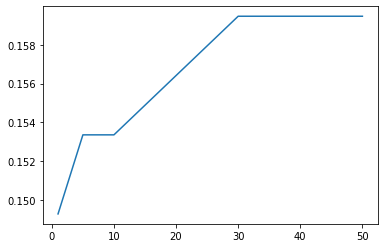

In [28]:
print(error)
plt.plot(rangeC, error)